In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("data.csv")
df.head(15)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
# Названия колонок прыгают из-за лишникх пробелов. Зафиксируем
df.columns = (['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'])

In [4]:
# pp.ProfileReport(df)

In [5]:
df.describe()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year ($)      27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [7]:
# Делим country-year на country и year
df["year"] = df["country-year"].str[-4:].astype("int")
df["country"] = df["country-year"].str[:-4]
# На случай повторного применения
try:
#     gdp_for_year - не число, конвертируем
    df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(",","").astype("int64")
except Exception as e:
    pass
# Много пустых значений. Удалить наблюдения не можем, их много, заменяем пустые нулями
df["HDI for year"] = df["HDI for year"].fillna(0)

df.sample(15)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country
22379,female,35-54 years,1,14431,6.93,Seychelles2014,0.772,1342997306,16018,Generation X,2014,Seychelles
11306,male,55-74 years,15,31720,47.29,Guyana2009,0.000,2061323854,3076,Silent,2009,Guyana
16876,male,75+ years,156,1236980,12.61,Mexico2011,0.748,1180489563964,10965,Silent,2011,Mexico
8777,male,55-74 years,210,391100,53.69,Finland1990,0.783,141517648888,30271,G.I. Generation,1990,Finland
3743,male,25-34 years,184,696461,26.42,Belgium2010,0.883,483548031197,47355,Generation X,2010,Belgium
12721,female,75+ years,9,213458,4.22,Israel2010,0.883,233609522091,34104,Silent,2010,Israel
7740,female,5-14 years,5,1308600,0.38,Ecuador1988,0.000,13051886552,1519,Generation X,1988,Ecuador
10062,male,35-54 years,72,1253500,5.74,Greece1988,0.000,76261278405,8070,Silent,1988,Greece
22786,male,55-74 years,133,379898,35.01,Slovakia1993,0.000,16452201101,3334,Silent,1993,Slovakia
16314,male,25-34 years,33,100700,32.77,Mauritius1996,0.000,4421943910,4444,Generation X,1996,Mauritius


In [8]:
# Кодируем категориальные переменные
labelEnc = LabelEncoder()
columns_for_encode = ["sex", "age", "country", "generation"]
for column in columns_for_encode:
    df[column + "_enc"] = labelEnc.fit_transform(df[column])
    
df.sample(15)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country,sex_enc,age_enc,country_enc,generation_enc
23115,female,35-54 years,40,297875,13.43,Slovenia2001,0.000,20875387068,10979,Boomers,2001,Slovenia,0,2,84,0
16404,female,25-34 years,5,95550,5.23,Mauritius2003,0.000,5609831328,5136,Generation X,2003,Mauritius,0,1,57,2
1002,male,15-24 years,7,304800,2.30,Armenia1993,0.000,1201313201,357,Generation X,1993,Armenia,1,0,3,2
22719,female,15-24 years,14,255000,5.49,Singapore2011,0.903,275966926379,76638,Millenials,2011,Singapore,0,0,82,4
12502,male,35-54 years,74,546900,13.53,Israel1992,0.000,75575902932,16469,Boomers,1992,Israel,1,2,43,0
22534,male,55-74 years,21,171300,12.26,Singapore1996,0.000,96403758865,34148,Silent,1996,Singapore,1,4,82,5
16727,female,35-54 years,95,9136813,1.04,Mexico1998,0.000,526502129378,6064,Boomers,1998,Mexico,0,2,58,0
18195,male,25-34 years,56,345406,16.21,Norway2013,0.942,523502127660,109804,Millenials,2013,Norway,1,1,64,4
20869,male,25-34 years,233,1719127,13.55,Romania2011,0.786,184367381749,9086,Millenials,2011,Romania,1,1,74,4
5999,male,25-34 years,379,3994717,9.49,Colombia2015,0.000,291519591533,6552,Millenials,2015,Colombia,1,1,20,4


In [9]:
# Все колонки набора
df.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation', 'year', 'country', 'sex_enc',
       'age_enc', 'country_enc', 'generation_enc'],
      dtype='object')

In [10]:
# Колонки для исключения из тренировочного набора 
# suicides_no - нужно ли исключать исходя из логики?... Ниже будет вариант с исключением этой переменной
del_cols = ([
    'country-year' #,
#     "suicides_no"
])

# Колонка для прогнозирования
target_col = ['suicides/100k pop']

# Итоговый сет для обучения
df2 = df.drop(columns_for_encode + del_cols, axis = 1)
df2.sample(15)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),year,sex_enc,age_enc,country_enc,generation_enc
27555,2,241598,0.83,0.000,53274304222,16696,2015,0,3,99,3
1780,110,1526305,7.21,0.000,1349034029453,60656,2015,0,0,5,4
24273,24,39222,61.19,0.000,2936612022,6397,2007,1,1,88,2
16202,0,48500,0.00,0.000,1469046115,1636,1986,0,4,57,1
1732,93,1495053,6.22,0.930,1394280784778,66770,2011,0,0,5,4
25988,7,171156,4.09,0.000,20214385965,4508,2009,1,4,94,5
13884,621,1414530,43.90,0.000,24636593223,1788,2002,1,0,47,4
27761,235,2375259,9.89,0.655,39332770929,1533,2010,1,1,100,2
19464,99,210020,47.14,0.000,99698453261,10566,1994,1,5,70,1
16128,0,54987,0.00,0.822,9507645260,23984,2011,0,2,56,2


In [11]:
# Делим на признаки и таргетную переменную
x_columns =[x for x in df2.columns if x != 'suicides/100k pop']
X = df2[x_columns]
y = df2.loc[:,['suicides/100k pop']].iloc[:,0].values

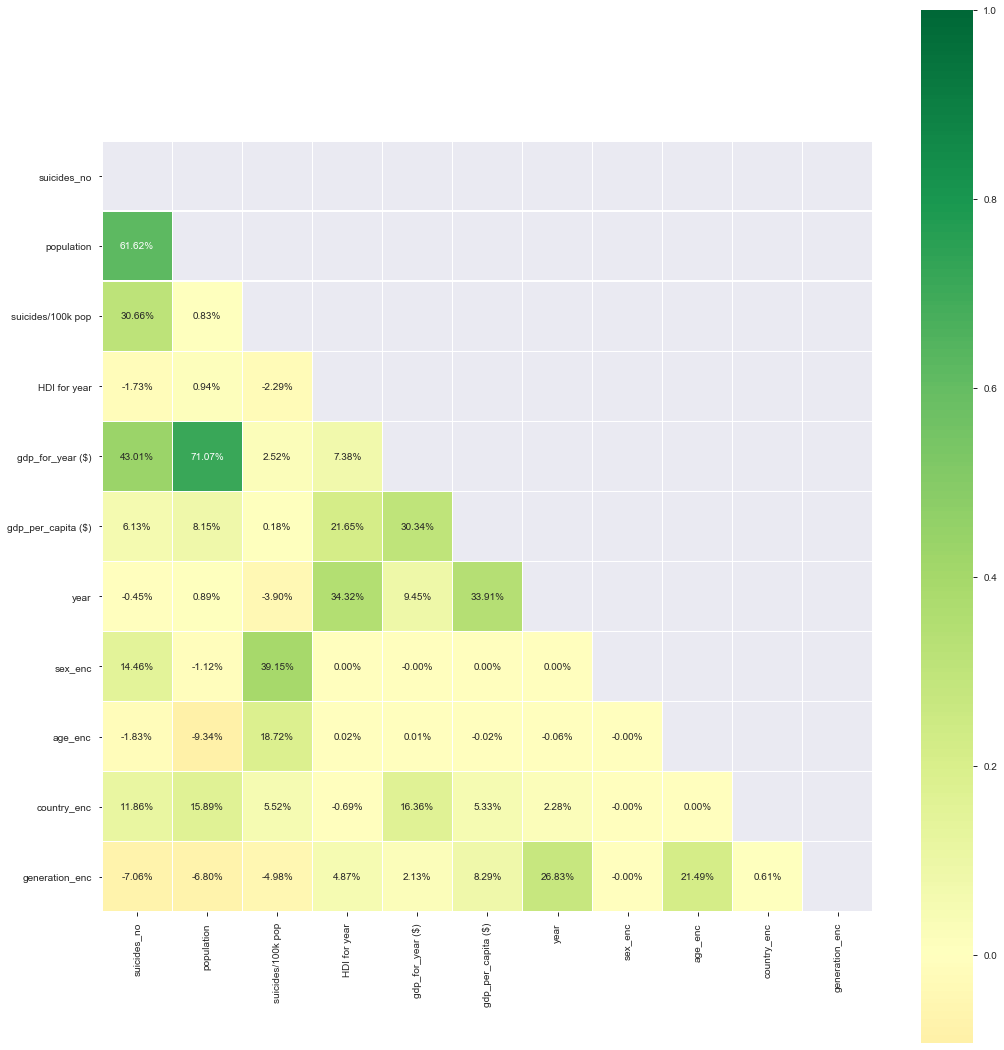

In [12]:
# Посмотрим на корреляции между переменными
plt.figure(figsize = (15,15))
corr = df2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
        data=corr,
        mask=mask,
        annot=True,
        cmap='RdYlGn',
        fmt="0.2%",
        linewidths=0.2,
        square=True,
        center=0
)
plt.tight_layout()
plt.show()

In [13]:
# Делим сет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

In [14]:
# Создаем модель деревья решений
# Выбираем 100 деревьев в качестве параметра
model=RandomForestRegressor(n_estimators=100)

# Обучаем модель
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

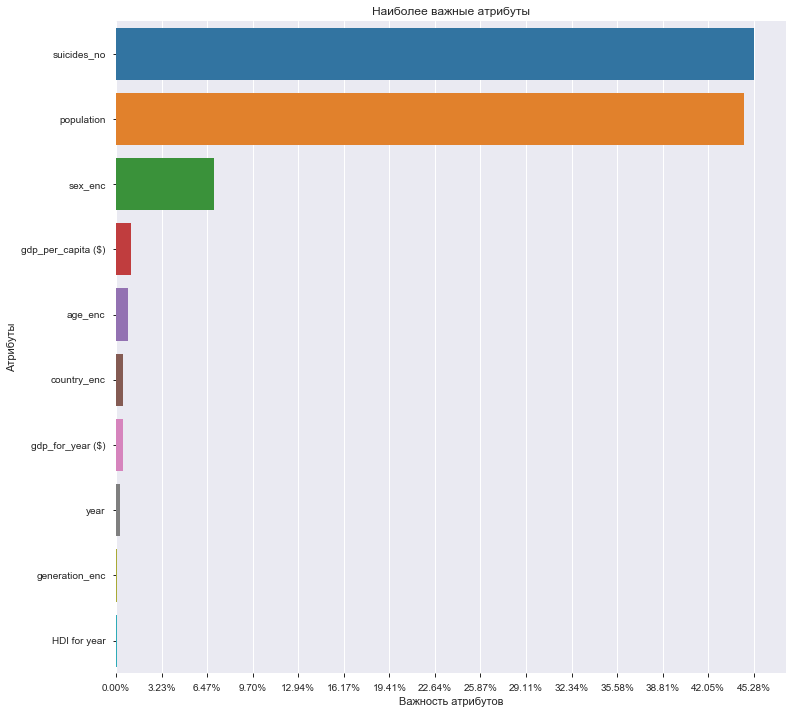

,0
suicides_no,0.452794
population,0.445986
sex_enc,0.069487
gdp_per_capita ($),0.010454
age_enc,0.008130
country_enc,0.004699
gdp_for_year ($),0.004589
year,0.002644
generation_enc,0.000747
HDI for year,0.000473


In [15]:
headers = list(X_train.columns.values)
# Важность признаков
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)
x_ticks = np.linspace(start = 0, stop=max(feature_imp), num =  15, endpoint = True)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")

# Важность на графике
plt.show()
# И в DataFrame
pd.DataFrame(feature_imp)

In [16]:
# Real vc Prediction

# Значения y из тестовой выборки 
y_vals = pd.DataFrame({"suicides/100k pop":y_test})
# Предсказанные значения
y_vals["Prediction"] = model.predict(X_test).tolist()
y_vals.sort_values(by="suicides/100k pop", inplace= True)

y_vals.sample(15)

,suicides/100k pop,Prediction
4779,29.09,28.6691
5649,0.00,0.0000
8376,1.48,1.4842
12602,0.17,0.1697
4949,4.60,4.6991
9957,15.48,15.0437
7540,1.36,1.3860
8037,58.54,56.4563
8856,0.27,0.2786
9603,4.96,5.0029


In [17]:
# Метрики предсказания модели

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

regression_metrics = ([
    "explained_variance_score",
    "max_error",
    "mean_absolute_error",
    "mean_squared_error",
    "mean_squared_log_error",
    "median_absolute_error",
    "r2_score"
])

metrics = {}
for metric in regression_metrics:
    result = globals()[metric](y_vals.iloc[:,0].values, y_vals.iloc[:,1].values)
    metrics[metric] = result
# Выведем метрики
pd.DataFrame(metrics, index=[0]).T

,0
explained_variance_score,0.982428
max_error,135.899000
mean_absolute_error,0.456612
mean_squared_error,6.205719
mean_squared_log_error,0.001253
median_absolute_error,0.055700
r2_score,0.982395


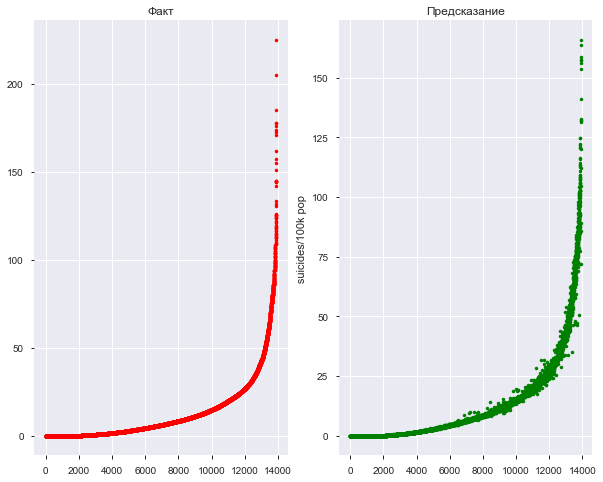

In [18]:
# Визуализация предсказаний
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
ax = axes.flatten()
plt.ylabel("suicides/100k pop")
x_line = list(range(0,len(y_test)))
ax[0].plot(x_line, y_vals.iloc[:,0].values, "r.")
ax[1].plot(x_line, y_vals.iloc[:,1].values, "g.")

ax[0].set_title("Факт")
ax[1].set_title("Предсказание")
plt.show()

### Исключаем колонку *suicides_no*  
Хотя в описании нужно вроде бы как просто предсказать кол-во суицидов на 1000 человек, складывается ощущение, что зная точное кол-во смертей за год, задача сильно упрощается, что является "читерством".
Попробуем исключить эту колонку.

In [19]:
# Колонки для исключения из признаков 
del_cols = ([
    'country-year',
     "suicides_no"
])
# Таргетная колонка
target_col = ['suicides/100k pop']
df2 = df.drop(columns_for_encode + del_cols, axis = 1)

df2.sample(15)

,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),year,sex_enc,age_enc,country_enc,generation_enc
1257,195422,0.51,0.000,10546135160,3788,2016,0,0,3,4
12202,467626,26.94,0.000,82826146132,24259,1997,1,2,42,0
23300,332140,1.20,0.000,152586154514,3960,1997,0,5,85,1
9290,1639346,72.53,0.000,1494286655374,26714,2002,1,5,33,5
319,5835,0.00,0.000,438794778,7407,1989,1,1,1,0
6140,29520,27.10,0.000,11618286553,3639,1996,1,5,21,1
494,13374,0.00,0.000,1157005444,14114,2006,0,2,1,0
6314,592166,2.70,0.750,37268635287,8906,2010,0,2,21,2
23281,252261,15.86,0.000,43072415017,22036,2015,0,4,84,0
18825,669630,0.75,0.000,15929902138,2920,2009,0,3,67,3


In [20]:
# Делим данные на признаки и целевые значения
x_columns =[x for x in df2.columns if x != 'suicides/100k pop']
X = df2[x_columns]
y = df2.loc[:,['suicides/100k pop']].iloc[:,0].values

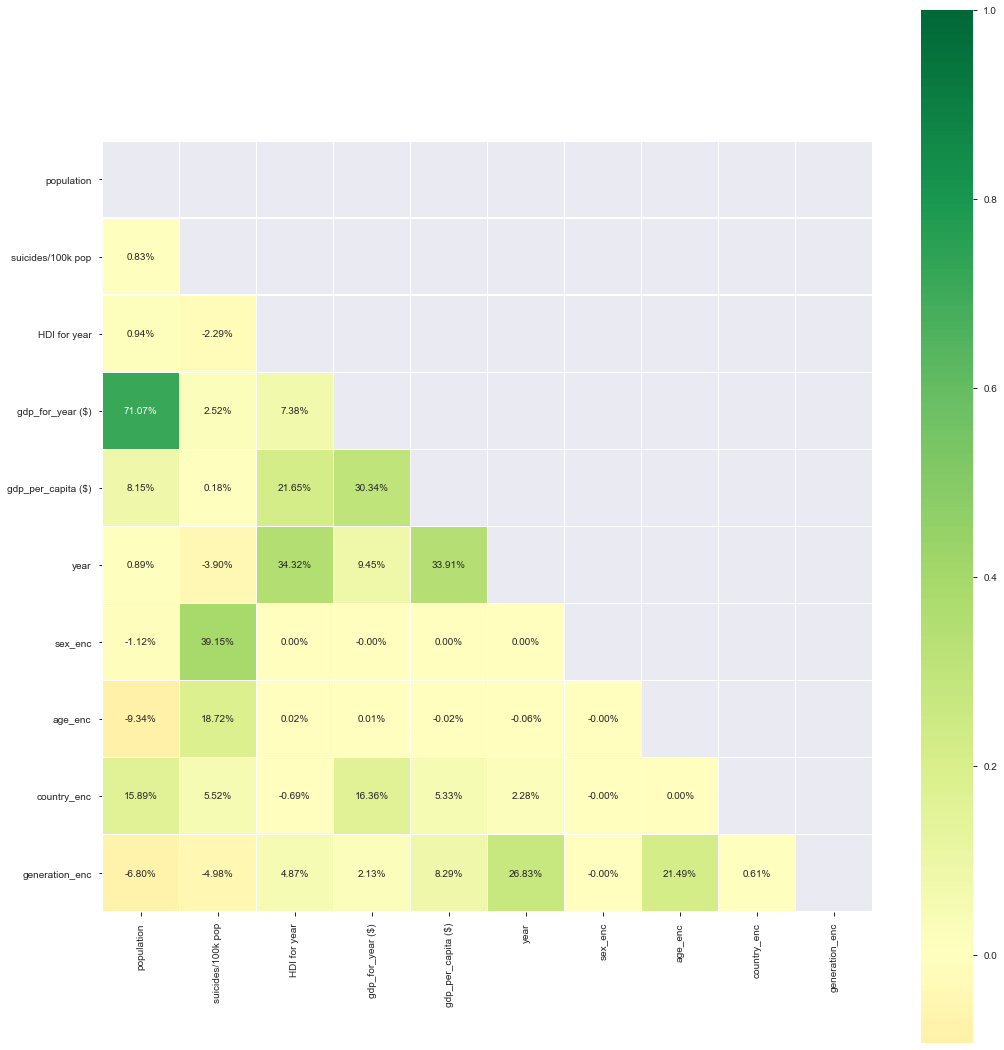

In [21]:
# Посмотрим на кореляции между признаками
plt.figure(figsize = (15,15))
corr = df2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
        data=corr, 
        mask=mask, 
        annot=True, 
        cmap='RdYlGn', 
        fmt="0.2%", 
        linewidths=0.2, 
        square=True, 
        center=0
)
plt.tight_layout()
plt.show()

In [22]:
# Делим данные на тренировочные и тестовые 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

In [23]:
# Создаем модель деревья решений
# Выбираем 100 деревьев в качестве параметра
model=RandomForestRegressor(n_estimators=100)

# Обучаем модель
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

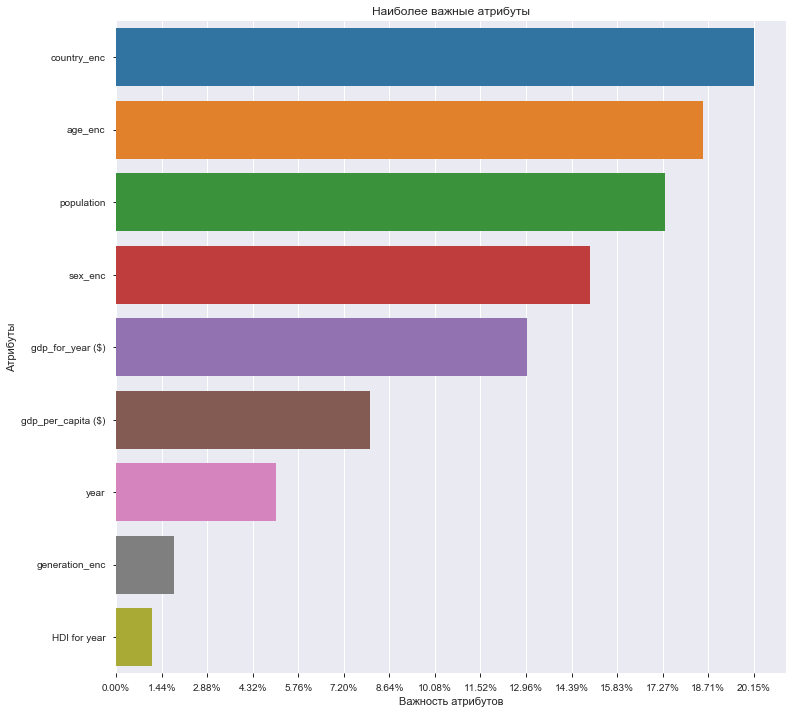

,0
country_enc,0.201528
age_enc,0.185327
population,0.173339
sex_enc,0.149683
gdp_for_year ($),0.129716
gdp_per_capita ($),0.080086
year,0.050673
generation_enc,0.018246
HDI for year,0.011402


In [24]:
headers = list(X_train.columns.values)
# Значимость признаков
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)

x_ticks = np.linspace(start = 0, stop=max(feature_imp), num =  15, endpoint = True)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# На графике
plt.show()
# В DataFrame
pd.DataFrame(feature_imp)

In [25]:
# Real vc Prediction

# Реальные значения
y_vals = pd.DataFrame({"suicides/100k pop":y_test})
# Предсказанные значения
y_vals["Prediction"] = model.predict(X_test).tolist()
y_vals.sort_values(by="suicides/100k pop", inplace= True)

y_vals.sample(15)

,suicides/100k pop,Prediction
3895,4.75,5.7532
13766,1.13,0.5531
10008,21.37,14.5729
10223,1.91,2.5614
7276,8.74,9.3181
7591,3.13,13.8383
5687,4.97,16.8784
2163,13.80,16.6576
10968,0.45,2.1837
11123,26.30,26.2782


In [26]:
# Метрики предсказания модели

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

regression_metrics = ([
    "explained_variance_score",
    "max_error",
    "mean_absolute_error",
    "mean_squared_error",
    "mean_squared_log_error",
    "median_absolute_error",
    "r2_score"
])

metrics = {}
for metric in regression_metrics:
    result = globals()[metric](y_vals.iloc[:,0].values, y_vals.iloc[:,1].values)
    metrics[metric] = result

    # Выведем метрики
pd.DataFrame(metrics, index=[0]).T

,0
explained_variance_score,0.827099
max_error,202.629100
mean_absolute_error,3.462249
mean_squared_error,60.952170
mean_squared_log_error,0.388709
median_absolute_error,1.343500
r2_score,0.827089


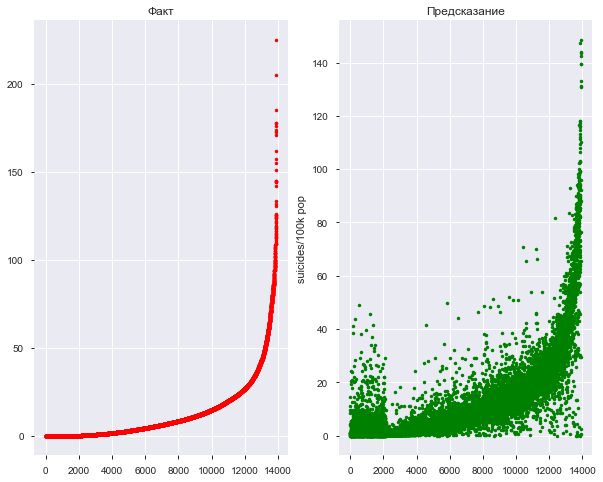

In [27]:
# Визуализация предсказаний
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
ax = axes.flatten()
plt.ylabel("suicides/100k pop")
x_line = list(range(0,len(y_test)))
ax[0].plot(x_line, y_vals.iloc[:,0].values, "r.")
ax[1].plot(x_line, y_vals.iloc[:,1].values, "g.")

ax[0].set_title("Факт")
ax[1].set_title("Предсказание")
plt.show()

Исключив колонку *suicides_no*, точность значительно упала.  
С другой стороны, возможно правильней колонку исключать, т.к в реальности мы вряд ли будем знать значение этой величины на момент прогноза.

#### The end